# Arundo's  Take home challenge to Muhammad Qasim
## Solved in Jupyter's notebook with following main steps
* Data Visualization
* Features selection and preprocessing
* Testing with different ML models
* A output csv file with predicted request_values using the trained ML model


In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils


Using TensorFlow backend.


### Read the given dataset 

In [12]:
#ALso remember to parse the date column. This will be helpful in the next step
data=pd.read_csv('Arundo_take_home_challenge_training_set.csv',sep=',',parse_dates=['date'])
#Have a look at the data
data.head(15)

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog
5,2014-09-06,1.0,314,7,32.8,22.2,9.9,Rain-Thunderstorm
6,2014-09-07,1.0,156,7,27.2,17.8,0.0,None
7,2014-09-08,1.0,150,7,23.3,17.8,0.0,None
8,2014-09-09,1.0,137,7,24.4,20.6,0.0,None
9,2014-09-10,1.0,156,7,26.7,17.8,0.0,None


In [11]:
data.tail(5)

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events
147,2015-02-26,1.0,378,15,0.6,-3.9,0.3,Snow
148,2015-02-27,1.0,556,16,-1.7,-6.7,0.3,Snow
149,2015-02-28,1.0,570,14,-0.6,-10.0,0.0,None
150,2015-03-01,1.0,615,16,0.0,-8.3,13.7,Rain-Snow
151,2015-03-02,1.0,369,16,3.3,-2.8,0.0,None


### Quick observations
* Daily data related to weather variations
* Covers mainly the winter months
* A better visualization of correlation of request_count needed with other variables


#### Let us try to get a better insight into the data. First let us have a look at the dependence of request counts on the float variables.

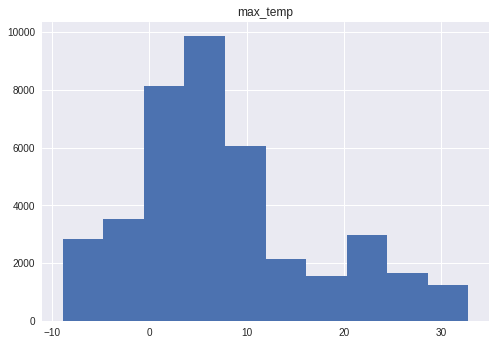

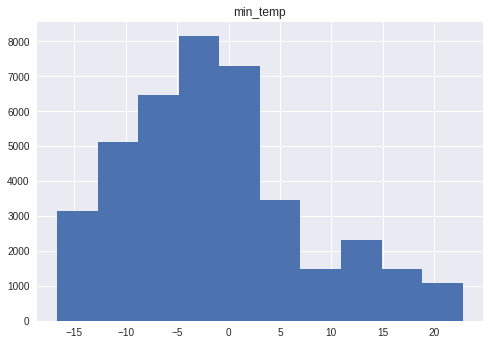

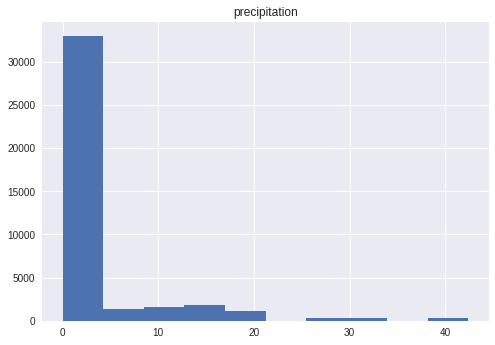

In [41]:
data.hist('max_temp',weights=data['request_count'])
data.hist('min_temp',weights=data['request_count'])
data.hist('precipitation',weights=data['request_count'])
plt.show()

### From the above histograms we see most of the requests comes when
* maximum temperature is below 10C 
* min temperature is below 2C 
* When there is zero precipitation

#### All in all the distribtion of request count is strongly correlated to floating variables and hence all floating variables are to be considered as features. 
#### Let's now evaluate the correlation of two variables 'events' and 'calendar code' with request_count which clearly are categorical variables. 

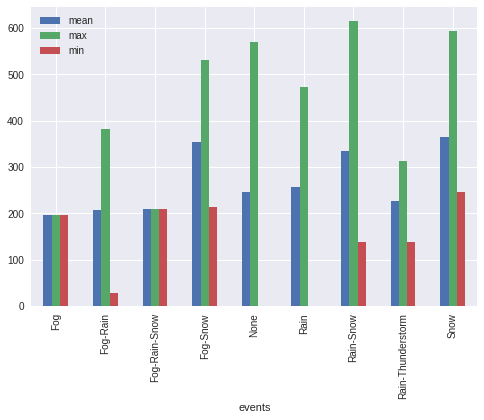

,count,mean,max,min
events,,,,
Fog,1,196.000000,196,196
Fog-Rain,5,206.400000,383,27
Fog-Rain-Snow,1,210.000000,210,210
Fog-Snow,3,355.000000,531,213
None,89,246.662921,570,0
Rain,31,256.483871,473,0
Rain-Snow,6,334.833333,615,137
Rain-Thunderstorm,2,226.000000,314,138
Snow,14,365.642857,593,247


In [52]:
#Sort request_count with events  
data.groupby('events').request_count.agg(['mean','max','min']).plot(kind='bar')
plt.show()
data.groupby('events').request_count.agg(['count','mean','max','min'])

#### Clearly, support request comes in more when the weather condition is overcast which is understandable. But not many data instances are available in most of the weather events except when the events are 'None', 'Rain' and 'Snow' which will make it challenging to train the ML model and test the accuracy. 

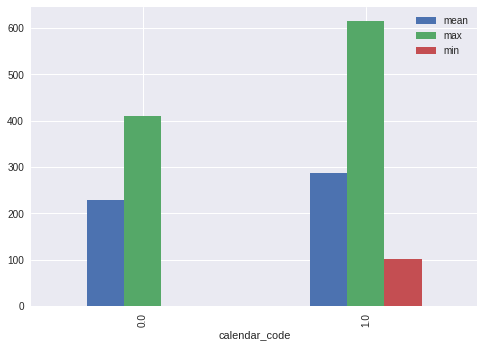

,count,mean,max,min
calendar_code,,,,
0.0,63,228.555556,410,0
1.0,89,287.505618,615,101


In [53]:
# Now sort request_count with calendar code
data.groupby('calendar_code').request_count.agg(['mean','max','min']).plot(kind='bar')
plt.show()
data.groupby('calendar_code').request_count.agg(['count','mean','max','min'])

#### Calendar code probably correspond to weather events variations in a single day. The distribution of calendar code behavior would be interesting to see.  

##### We further use violin plot for dependence on the categorical variables (https://blog.modeanalytics.com/violin-plot-examples/)

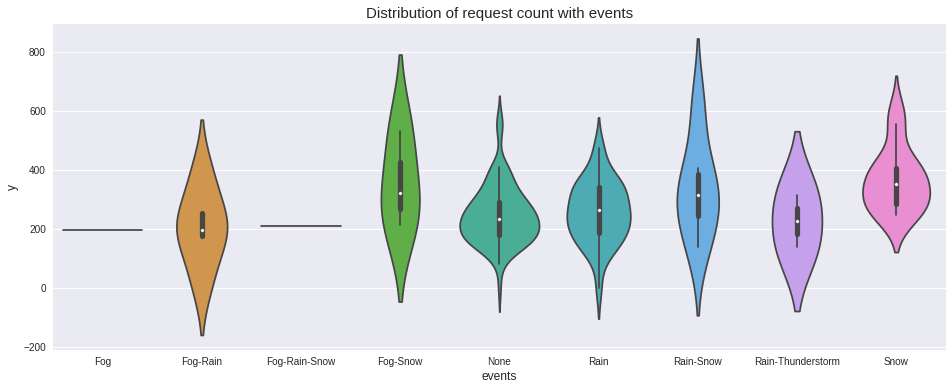

In [55]:
var_name = "events"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

#### For events with less data points, it is difficult to to see the distribution which will eventually reflect as an significant error in the train model or else would be difficult or not possible to split into taining, test and validation data sets. Certainly, more data points corresponding to these events would help in better trained model. 

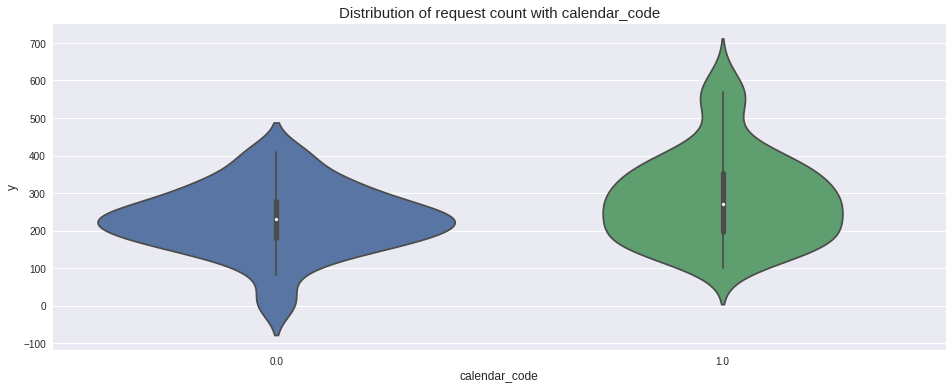

In [56]:
var_name = "calendar_code"
col_order = np.sort(training_data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=training_data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()

#### Significant distribution of request count over calendar code is visible

#### Next, lets analayze the impact of date. The dates covers mainly the winter months and may not be represented well if it is used as it is given. I realized may be the site maintenence is dependant on the working day or weekend instead. We start by adding an additional column with the week day (0: Monday, ... 6: Sunday)

In [57]:
data['day_of_week'] = data['date'].dt.dayofweek
data['week_day'] = data['date'].dt.weekday_name
data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events,day_of_week,week_day
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain,0,Monday
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm,1,Tuesday
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None,2,Wednesday
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None,3,Thursday
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog,4,Friday


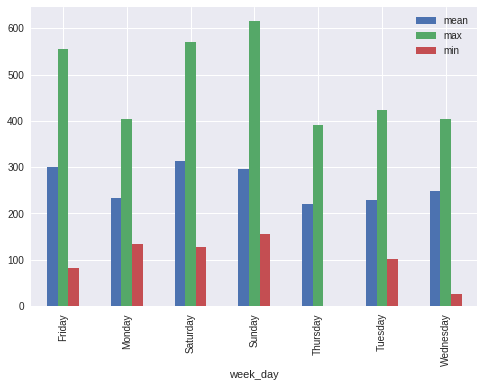

,count,mean,max,min
week_day,,,,
Friday,21,300.857143,556,82
Monday,23,234.434783,405,133
Saturday,22,313.090909,570,128
Sunday,22,295.818182,615,156
Thursday,21,219.571429,391,0
Tuesday,22,230.045455,423,101
Wednesday,21,248.047619,405,27


In [60]:
# We again choose the groupby and violin plots to see the underlying behaviour
data.groupby('week_day').request_count.agg(['mean','max','min']).plot(kind='bar')
plt.show()
data.groupby('week_day').request_count.agg(['count','mean','max','min'])



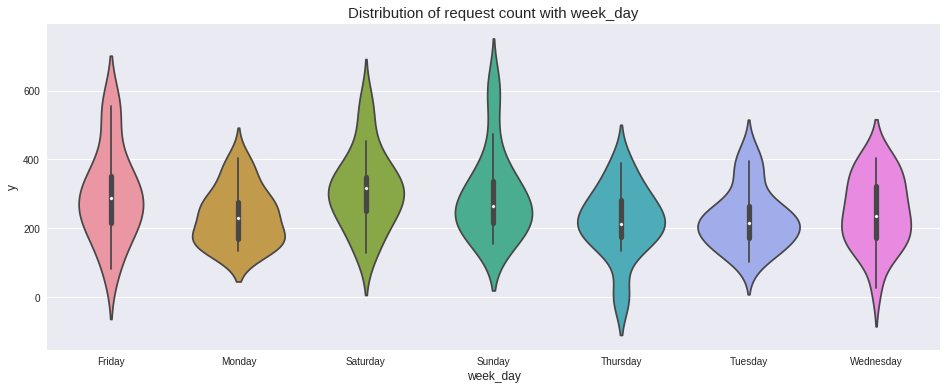

In [63]:
var_name = "week_day"
col_order = np.sort(data[var_name].unique()).tolist()
plt.figure(figsize=(16,6))
sns.violinplot(x=var_name, y='request_count', data=data, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of request count with "+var_name, fontsize=15)
plt.show()


#### Clearly, Weekends (Friday-Sunday) are the most active period while Monday-Thursday show nearly uniform mean request_count.

#### Next we convert the events into some unique identifiers (integers). This will result in an additional column "events_code".

In [64]:
data['events_code'] = pd.Categorical(data["events"]).codes
data.head()

,date,calendar_code,request_count,site_count,max_temp,min_temp,precipitation,events,day_of_week,week_day,events_code
0,2014-09-01,0.0,165,6,30.6,22.8,0.0,Rain,0,Monday,5
1,2014-09-02,1.0,138,7,32.8,22.8,15.5,Rain-Thunderstorm,1,Tuesday,7
2,2014-09-03,1.0,127,7,29.4,18.3,0.0,None,2,Wednesday,4
3,2014-09-04,1.0,174,7,29.4,17.2,0.0,None,3,Thursday,4
4,2014-09-05,1.0,196,7,30.6,21.7,0.0,Fog,4,Friday,0


#### Since request_count is the target variable, we store it separately as "y" for ML model

In [66]:
y=data["request_count"]
print("Shape of y ",y.shape)

Shape of y  (152,)


#### Drop the redundant columns now "date","events","request_count" and week_day. 

In [68]:
data = data.drop(["date","events","request_count","week_day"],axis=1)
data.head()

,calendar_code,site_count,max_temp,min_temp,precipitation,day_of_week,events_code
0,0.0,6,30.6,22.8,0.0,0,5
1,1.0,7,32.8,22.8,15.5,1,7
2,1.0,7,29.4,18.3,0.0,2,4
3,1.0,7,29.4,17.2,0.0,3,4
4,1.0,7,30.6,21.7,0.0,4,0


#### The categorical values day_of_week, events_code and calender code needs to be one-hot-encoded to be used as a feature input vector.

In [70]:
data= pd.get_dummies(data,columns=["calendar_code","events_code","day_of_week"],prefix=["calendar","event","week"])
data.head()

,site_count,max_temp,min_temp,precipitation,calendar_0.0,calendar_1.0,event_0,event_1,event_2,event_3,...,event_6,event_7,event_8,week_0,week_1,week_2,week_3,week_4,week_5,week_6
0,6,30.6,22.8,0.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7,32.8,22.8,15.5,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,7,29.4,18.3,0.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,7,29.4,17.2,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,7,30.6,21.7,0.0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### data DataFrame is now ready to be used as feature matrix. Lets assign data values to X.

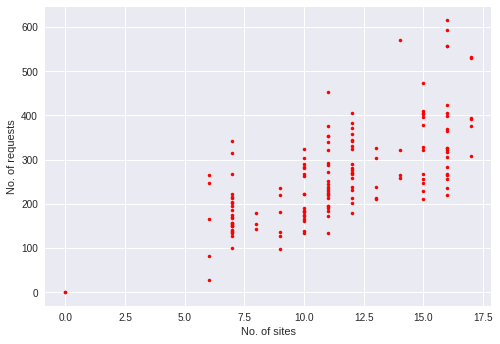

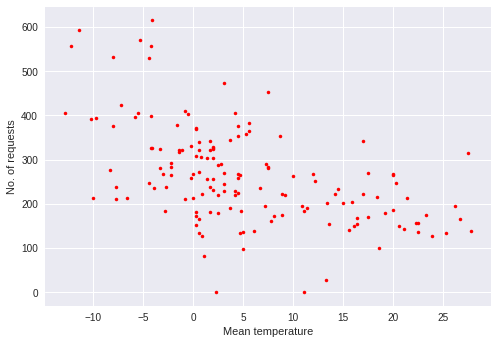

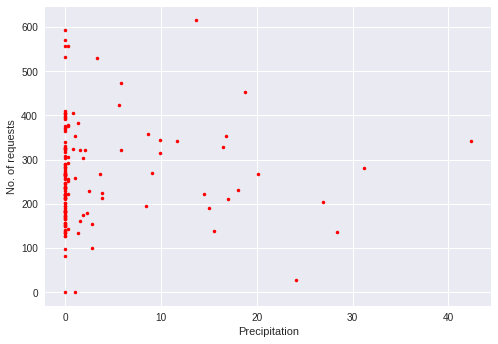

In [92]:
X=data.values

plt.figure(1)
plt.plot(X[:,0],y[:],'r.')
plt.xlabel("No. of sites")
plt.ylabel("No. of requests")
plt.show()

plt.figure(1)
plt.plot((X[:,1]+X[:,2])/2.0,y[:],'r.')
plt.xlabel("Mean temperature")
plt.ylabel("No. of requests")
plt.show()

plt.figure(1)
plt.plot(X[:,3],y[:],'r.')
plt.xlabel("Precipitation")
plt.ylabel("No. of requests")
plt.show()

#### It appears that the no of requests has some kind of a quadratic dependence on the mean temperature so in addition to max and min temperature we should construct a new feature $((mintemp+maxtemp)/2)^2$

In [97]:
X=np.column_stack([X,(X[:,1]+X[:,2])**2.0])
print(X[1,:])

[  7.00000000e+00   3.28000000e+01   2.28000000e+01   1.55000000e+01
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   3.09136000e+03]


In [98]:
#Split the data into training and validation test, shuffling of data won't be necessary since data seems to be already random
X_train, X_val, y_train, y_val =  train_test_split(X,y,test_size=0.2,random_state = 0)

### Conduct a multivariate linear regression on the dataset.

In [161]:
#Multivariabte regression
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_train_pred=regr.predict(X_train)
print("Mean squared error: %.2f" % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean squared error with validation set: %.2f" % np.mean((regr.predict(X_val) - y_val) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, y_train))
print('Variance score with validation set: %.2f' % regr.score(X_val, y_val))

Mean squared error: 2050.26
Mean squared error with validation set: 3354.57
Variance score: 0.82
Variance score with validation set: 0.77


#### Variance score decreases if the new column of $((mintemp+maxtemp)/2)^2$ is not considered.

## Load CSV file with missing request_count and predict request_count

test_data=pd.read_csv('Arundo_take_home_challenge_test_set.csv',sep=',',parse_dates=['date'])

In [141]:
# We must process the test csv data in similar way before predicting request_count 
# Add day of week and event code columns
test_data['day_of_week'] = test_data['date'].dt.dayofweek
test_data['events_code'] = pd.Categorical(test_data["events"]).codes
test_data.head()

,date,calendar_code,site_count,max_temp,min_temp,precipitation,events,day_of_week,events_code
0,2014-10-01,1.0,8,24.4,15.0,0.0,None,2,2
1,2014-10-02,1.0,8,21.1,12.8,0.0,None,3,2
2,2014-10-03,1.0,8,22.2,12.2,2.8,Rain,4,3
3,2014-10-04,1.0,7,21.7,7.2,10.7,Rain,5,3
4,2014-10-05,1.0,8,16.7,3.9,0.0,None,6,2


In [142]:
# Drop data and Events columns
test_data = test_data.drop(["date","events"],axis=1)
test_data.head()

,calendar_code,site_count,max_temp,min_temp,precipitation,day_of_week,events_code
0,1.0,8,24.4,15.0,0.0,2,2
1,1.0,8,21.1,12.8,0.0,3,2
2,1.0,8,22.2,12.2,2.8,4,3
3,1.0,7,21.7,7.2,10.7,5,3
4,1.0,8,16.7,3.9,0.0,6,2


In [143]:
test_data= pd.get_dummies(test_data,columns=["calendar_code","events_code","day_of_week"],prefix=["calendar","event","week"])
test_data.head()

,site_count,max_temp,min_temp,precipitation,calendar_1.0,event_0,event_1,event_2,event_3,event_4,week_0,week_1,week_2,week_3,week_4,week_5,week_6
0,8,24.4,15.0,0.0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,8,21.1,12.8,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,8,22.2,12.2,2.8,1,0,0,0,1,0,0,0,0,0,1,0,0
3,7,21.7,7.2,10.7,1,0,0,0,1,0,0,0,0,0,0,1,0
4,8,16.7,3.9,0.0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [145]:
# Assign test data to X_test and add ((minx+maxx)/2)^2 as an additional column
X_test=test_data.values
X_test=np.column_stack([X_test,(X_test[:,1]+X_test[:,2])**2.0])

In [147]:
y_test_pred=regr.predict(X_train)

In [172]:
pred = pd.DataFrame({'Predicted_request_counts':y_test_pred})
pred.head()

,Predicted_request_counts
0,154.123004
1,129.780083
2,-48.566100
3,234.618258
4,175.775505


In [160]:
pred.to_csv('predicted_request_counts_regression.csv', index=False)

## Now lets try a neural network, if it can improve the accuracy

In [162]:
m,input_layer_size=X.shape
hidden_layer_size = input_layer_size   
ANN_classifier = Sequential()
ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layer_size))
ANN_classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
ANN_classifier.add(Dense(units = 1, kernel_initializer = 'normal'))
ANN_classifier.compile(loss='mean_squared_error', optimizer='adam')
history=ANN_classifier.fit(X_train, y_train, batch_size = 15, epochs = 4000,verbose=0)

In [168]:
pred_train = ANN_classifier.predict(X_train)
pred = ANN_classifier.predict(X_val)
print("Mean squared error: ", np.mean((pred_train - y_train.values.reshape(-1,1)) ** 2))
print("Mean squared error validation: ", np.mean((pred - y_val.values.reshape(-1,1)) ** 2))


Mean squared error:  1856.66494965
Mean squared error validation:  3799.65488812


### Clearly the Mean Square error has increased on validation while the decreased on training set. Probably neural network is trying to overfit

#### Create Predicted_request_counts.csv with neural network fit

In [171]:
y_test_pred_ANN=ANN_classifier.predict(X_train)
pred_ANN = pd.DataFrame({'Predicted_request_counts':y_test_pred})
pred_ANN.head()

,Predicted_request_counts
0,154.123004
1,129.780083
2,-48.566100
3,234.618258
4,175.775505


In [170]:
pred_ANN.to_csv('predicted_request_counts_ANN.csv', index=False)